## Rossman Store Sales

This project aims to forecast daily sales across Rossmann’s 1,115 stores in Germany. Rossmann operates more than 3,000 pharmacies in seven European countries, and store managers are responsible for forecasting sales six weeks in advance. Sales are affected by many factors, including promotions, competition, holidays, seasonality, and local factors. Therefore, each manager’s forecasts, based on their own circumstances, can have different levels of accuracy.

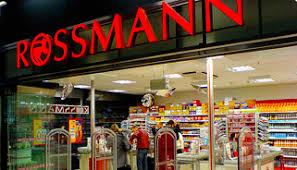



<a href='https://www.kaggle.com/competitions/rossmann-store-sales' target=_blank>You can find the competition here</a>

In [5]:
import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

/kaggle/input/rossmann-store-sales/sample_submission.csv
/kaggle/input/rossmann-store-sales/store.csv
/kaggle/input/rossmann-store-sales/train.csv
/kaggle/input/rossmann-store-sales/test.csv


## Import Libraries

In [6]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings('ignore')

In [121]:
train=pd.read_csv('/kaggle/input/rossmann-store-sales/train.csv')
test=pd.read_csv('/kaggle/input/rossmann-store-sales/test.csv')
s=pd.read_csv('/kaggle/input/rossmann-store-sales/store.csv')
#Reading the files.

## EDA

In [8]:
train.head()

,Store,DayOfWeek,Date,Sales,Customers,Open,Promo,StateHoliday,SchoolHoliday
0,1,5,2015-07-31,5263,555,1,1,0,1
1,2,5,2015-07-31,6064,625,1,1,0,1
2,3,5,2015-07-31,8314,821,1,1,0,1
3,4,5,2015-07-31,13995,1498,1,1,0,1
4,5,5,2015-07-31,4822,559,1,1,0,1


In [9]:
test.head()

,Id,Store,DayOfWeek,Date,Open,Promo,StateHoliday,SchoolHoliday
0,1,1,4,2015-09-17,1.0,1,0,0
1,2,3,4,2015-09-17,1.0,1,0,0
2,3,7,4,2015-09-17,1.0,1,0,0
3,4,8,4,2015-09-17,1.0,1,0,0
4,5,9,4,2015-09-17,1.0,1,0,0


In [10]:
s.head()

,Store,StoreType,Assortment,CompetitionDistance,CompetitionOpenSinceMonth,CompetitionOpenSinceYear,Promo2,Promo2SinceWeek,Promo2SinceYear,PromoInterval
0,1,c,a,1270.0,9.0,2008.0,0,NaN,NaN,NaN
1,2,a,a,570.0,11.0,2007.0,1,13.0,2010.0,"Jan,Apr,Jul,Oct"
2,3,a,a,14130.0,12.0,2006.0,1,14.0,2011.0,"Jan,Apr,Jul,Oct"
3,4,c,c,620.0,9.0,2009.0,0,NaN,NaN,NaN
4,5,a,a,29910.0,4.0,2015.0,0,NaN,NaN,NaN


In [11]:
s.shape

(1115, 10)

In [12]:
train.shape

(1017209, 9)

In [13]:
test.shape

(41088, 8)

In [14]:
train.isnull().sum()

Store            0
DayOfWeek        0
Date             0
Sales            0
Customers        0
Open             0
Promo            0
StateHoliday     0
SchoolHoliday    0
dtype: int64

In [57]:
test.isnull().sum()

Id                0
Store             0
DayOfWeek         0
Date              0
Open             11
Promo             0
StateHoliday      0
SchoolHoliday     0
dtype: int64

In [58]:
# test['Open']=test['Open'].fillna('0')

In [122]:
test=test.dropna()

In [123]:
df=pd.concat([train,test])
#Merging the files.

In [61]:
df.head()

,Store,DayOfWeek,Date,Sales,Customers,Open,Promo,StateHoliday,SchoolHoliday,Id
0,1,5,2015-07-31,5263.0,555.0,1.0,1,0,1,NaN
1,2,5,2015-07-31,6064.0,625.0,1.0,1,0,1,NaN
2,3,5,2015-07-31,8314.0,821.0,1.0,1,0,1,NaN
3,4,5,2015-07-31,13995.0,1498.0,1.0,1,0,1,NaN
4,5,5,2015-07-31,4822.0,559.0,1.0,1,0,1,NaN


In [62]:
df.corr(numeric_only=True)

,Store,DayOfWeek,Sales,Customers,Open,Promo,SchoolHoliday,Id
Store,1.000000,-0.000005,0.005126,0.024325,-0.000034,0.000047,-0.000171,0.020908
DayOfWeek,-0.000005,1.000000,-0.462125,-0.386445,-0.531912,-0.394608,-0.210898,0.054736
Sales,0.005126,-0.462125,1.000000,0.894711,0.678472,0.452345,0.085124,NaN
Customers,0.024325,-0.386445,0.894711,1.000000,0.616768,0.316169,0.071568,NaN
Open,-0.000034,-0.531912,0.678472,0.616768,1.000000,0.296440,0.095767,-0.049313
Promo,0.000047,-0.394608,0.452345,0.316169,0.296440,1.000000,0.075069,-0.016878
SchoolHoliday,-0.000171,-0.210898,0.085124,0.071568,0.095767,0.075069,1.000000,0.387485
Id,0.020908,0.054736,NaN,NaN,-0.049313,-0.016878,0.387485,1.000000


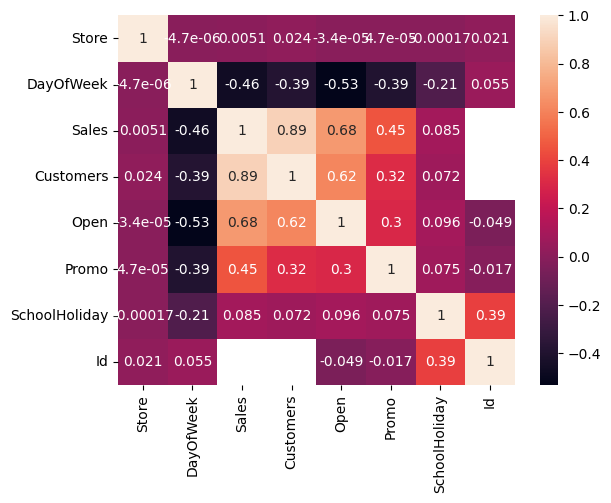

In [63]:
sns.heatmap(df.corr(numeric_only=True),annot=True);

## Data Visualization

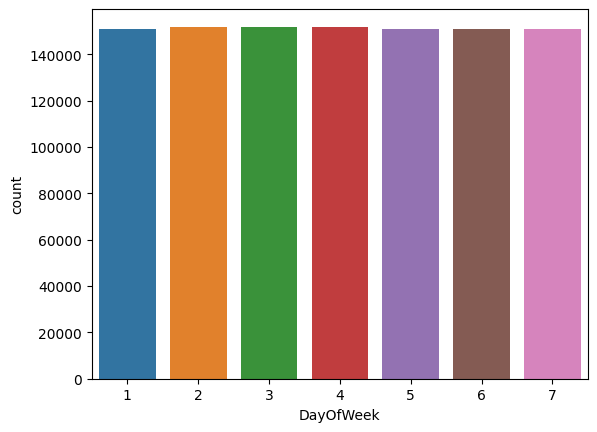

In [22]:
sns.countplot(x=df['DayOfWeek']);

In [23]:
df['Open'].value_counts()

Open
1.0    879485
0.0    178801
Name: count, dtype: int64

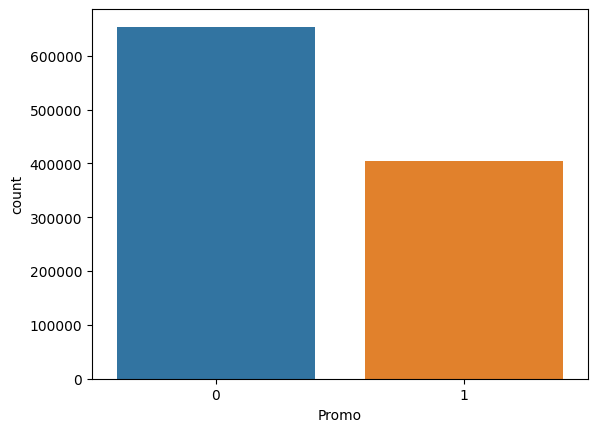

In [24]:
sns.countplot(x=df['Promo']);

In [66]:
df['SchoolHoliday'].value_counts()

SchoolHoliday
0    858343
1    199943
Name: count, dtype: int64

In [25]:
df['StateHoliday'].value_counts()

StateHoliday
0    895984
0    131072
a     20440
b      6690
c      4100
Name: count, dtype: int64

In [124]:
df.drop('StateHoliday', axis=1, inplace=True)

In [125]:
df.drop('Date', axis=1 ,inplace=True)

## Modelling

In [98]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score, mean_squared_error

In [99]:
train.head()

,Store,DayOfWeek,Date,Sales,Customers,Open,Promo,StateHoliday,SchoolHoliday
0,1,5,2015-07-31,5263,555,1,1,0,1
1,2,5,2015-07-31,6064,625,1,1,0,1
2,3,5,2015-07-31,8314,821,1,1,0,1
3,4,5,2015-07-31,13995,1498,1,1,0,1
4,5,5,2015-07-31,4822,559,1,1,0,1


In [100]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1017209 entries, 0 to 1017208
Data columns (total 9 columns):
 #   Column         Non-Null Count    Dtype 
---  ------         --------------    ----- 
 0   Store          1017209 non-null  int64 
 1   DayOfWeek      1017209 non-null  int64 
 2   Date           1017209 non-null  object
 3   Sales          1017209 non-null  int64 
 4   Customers      1017209 non-null  int64 
 5   Open           1017209 non-null  int64 
 6   Promo          1017209 non-null  int64 
 7   StateHoliday   1017209 non-null  object
 8   SchoolHoliday  1017209 non-null  int64 
dtypes: int64(7), object(2)
memory usage: 69.8+ MB


In [126]:
df=pd.get_dummies(df)

In [127]:
train=df[:1017209]
test=df[1017209:]

In [130]:
train.drop('Id', axis=1, inplace=True)

In [131]:
train.isnull().sum()

Store            0
DayOfWeek        0
Sales            0
Customers        0
Open             0
Promo            0
SchoolHoliday    0
dtype: int64

In [132]:
x=train.drop('Sales', axis=1)
y=train[['Sales']]

In [133]:
x_train, x_test, y_train, y_test=train_test_split(x, y, test_size=0.20, random_state=42)

In [134]:
lr=LinearRegression()
model=lr.fit(x_train, y_train)
pred=lr.predict(x_test)
rmse=mean_squared_error(y_test, pred)**.5
r2=r2_score(y_test, pred)

print('Root Mean Squared Error:', rmse)
print('R2 Score:', r2)

Root Mean Squared Error: 1485.8673548418697
R2 Score: 0.8507111890298578


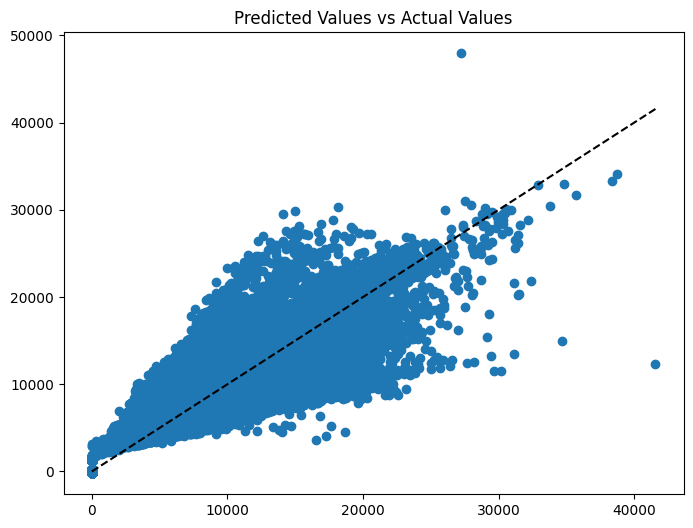

In [157]:
y_pred=model.predict(x_test)
plt.figure(figsize=(8, 6))
plt.scatter(y_test, y_pred)
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'k--')
plt.title('Predicted Values vs Actual Values');
#for Linear Regression

In [158]:
feature_importance=pd.DataFrame({'Feature':x_train.columns, 'Coefs':lr.coef_[0]})

In [159]:
feature_importance=feature_importance.sort_values(by='Coefs', ascending=False)

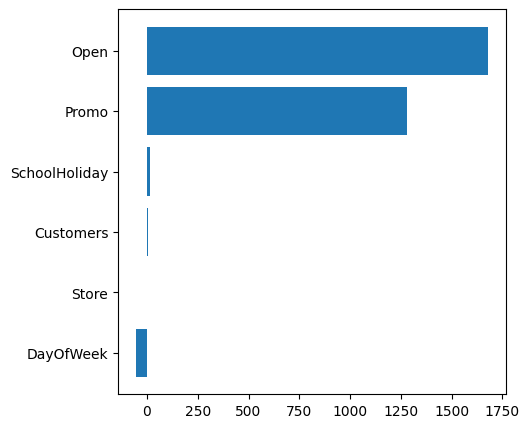

In [161]:
plt.figure(figsize=(5,5))
plt.barh(feature_importance['Feature'],feature_importance['Coefs'])
plt.gca().invert_yaxis()

In [162]:
residuals=y_test-pred

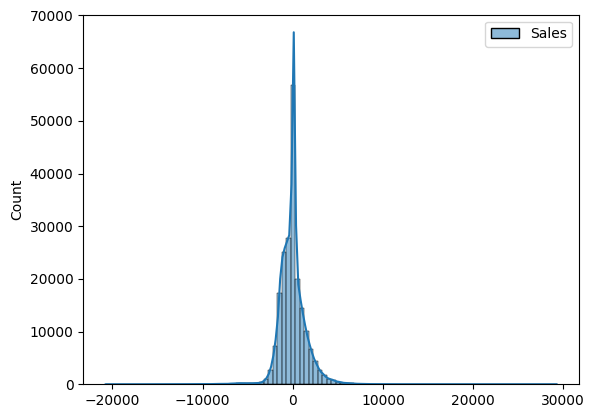

In [163]:
sns.histplot(residuals, kde=True,bins=100);

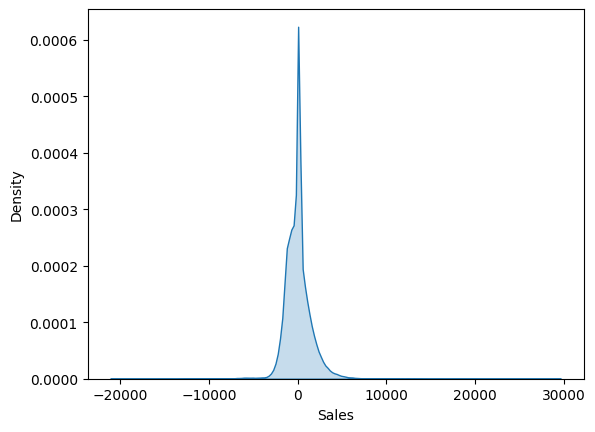

In [164]:
sns.kdeplot(x=residuals['Sales'], fill=True);

In [47]:
from xgboost import XGBRegressor
xgb=XGBRegressor()

model=xgb.fit(x_train, y_train)
pred=xgb.predict(x_test)
rmse=mean_squared_error(y_test, pred)**.5
r2=r2_score(y_test, pred)

print('Root Mean Squared Error:', rmse)
print('R2 Score:', r2)

Root Mean Squared Error: 1154.7869787404195
R2 Score: 0.9098281597253313


## Test Data Prediction

In [145]:
test1=test.drop('Sales',axis=1)

In [141]:
test1=test.drop('Id', axis=1)

In [142]:
test1

,Store,DayOfWeek,Sales,Customers,Open,Promo,SchoolHoliday
0,1,4,NaN,NaN,1.0,1,0
1,3,4,NaN,NaN,1.0,1,0
2,7,4,NaN,NaN,1.0,1,0
3,8,4,NaN,NaN,1.0,1,0
4,9,4,NaN,NaN,1.0,1,0
...,...,...,...,...,...,...,...
41083,1111,6,NaN,NaN,1.0,0,0
41084,1112,6,NaN,NaN,1.0,0,0
41085,1113,6,NaN,NaN,1.0,0,0
41086,1114,6,NaN,NaN,1.0,0,0


In [147]:
test1['Customers'] = 0  # Tüm değerlere 0 atar

In [148]:
test1.isnull().sum()

Store            0
DayOfWeek        0
Customers        0
Open             0
Promo            0
SchoolHoliday    0
Id               0
dtype: int64

In [150]:
tahmin

array([1111.3695, 1111.3695, 1135.8176, ..., 1859.2501, 1859.2501,
       2237.8237], dtype=float32)

In [151]:
tahmin1=pd.DataFrame()

In [152]:
tahmin1['Id']=test['Id']

In [153]:
tahmin1['Sales']=tahmin

In [154]:
tahmin1.info()

<class 'pandas.core.frame.DataFrame'>
Index: 41077 entries, 0 to 41087
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Id      41077 non-null  float64
 1   Sales   41077 non-null  float32
dtypes: float32(1), float64(1)
memory usage: 802.3 KB


In [155]:
tahmin1.to_csv('rossman_submission.csv')

In [156]:
tahmin1.head()

,Id,Sales
0,1.0,1111.369507
1,2.0,1111.369507
2,3.0,1135.817627
3,4.0,1135.817627
4,5.0,1135.817627


## Summary

The training and test data sets were read separately and combined into a suitable format for analysis. At this stage, the structure and features of both data sets were examined. Visualization of the data provided a better understanding of the factors affecting store sales and trends over time. Sales trends and seasonality were analyzed using graphs. Unnecessary columns were cleaned and only important features were left for model training. This was done to improve the performance of the model. The cleaned data was trained with a suitable machine learning model for sales forecasting. Important metrics (coefficients and residuals) were examined to evaluate the performance of the model. The trained model made predictions on the test data set. The obtained predictions were saved in a file containing daily sales figures. The project was completed with the successful training of the model and the accurate recording of the predictions. This study makes a significant contribution to providing a more effective working environment for Rossmann store managers.

The project aims to enable managers to work more efficiently by predicting the sales of Rossmann stores. The results obtained will help store managers develop customer-focused strategies and increase team motivation. The project has been completed successfully and aims to provide new skills to the participants.